Перед тем, как обучить наше дерево решений на реальных данных о пассажирах Титаника, я сначала хочу обучить дерево решений на небольшом игрушечном датафрейме, показать работу дерева, чтобы лучше понять суть алгоритма. Продемонстрировать идею, и потом переходить к реальной практике.
Для этого я создам небольшой датафрейм, который понадобится для обучения решающих деревьев.

В этом разделе я не буду писать про метрики машинного обучения, для этого есть отдельная статья. Основная идея тут - просто показать на небольшом примере, что такое дерево решений, и как оно растёт.

In [1]:
from sklearn import tree
import pandas as pd
from IPython.display import SVG
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70%; !important;}</style>"
HTML(style)

In [2]:
# Создаю датафрейм:

data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


Есть две переменные X_1, X_2 и Y, принимающие значения 0 или 1. Переменные можно воспринимать как некие бинарные номинативные переменные.

**Задача**: научиться при помощи дерева решений предсказывать значения переменной Y, основываясь на значениях переменной X_1 и X_2.

Как я уже писал ранее, в отдельной статье, дерево решений часто сравнивают с тем, как мыслит человек. Для лучшего понимания, предлагаю посмотреть на данные и построить в голове логику работы алгоритма.

Если X_1 = 1, то Y чаще всего тоже равно 1. В противном случае, если X_1 = 0, то Y чаще всего тоже равно 0.

Теперь можно передать данные дереву решений и посмотреть на результат работы алгоритма.

In [3]:
# Перед обучением дерева, его надо "посадить"

clf = tree.DecisionTreeClassifier()

In [4]:
# Посмотрим, что у нас находится внутри дерева. Спойлер - пока ничего.

clf

DecisionTreeClassifier()

In [5]:
# Установлю критерий "энтропия". Далее буду использовать его.

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy')

Перед обучением дерева сделаю небольшую предобработку данных. Сохраню все фичи в переменную Х.

Переменную Y сохраню в переменную y (это будет пандосовская серия).
Когда мы используем Python для машинного обучения, существуют две сущности:

Х - данные, которые используются для обучения. Обычно данные представляются в виде многомерного массива, пандасовского датафрейма.

у - предсказываемая переменная. Это вектор.


In [6]:
X = data[['X_1', 'X_2']]
y = data.Y

Непосредственно обучение дерева с помощью метода fit(). Для этого дереву передаются переменная с фичами и целевая переменная.

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Внешне ничего не поменялось.

Но на самом деле, передав дереву переменные, дерево обучилось и нашло взаимосвязи.

Самый простой способ понять, чему научилось дерево решений - визуализировать его.

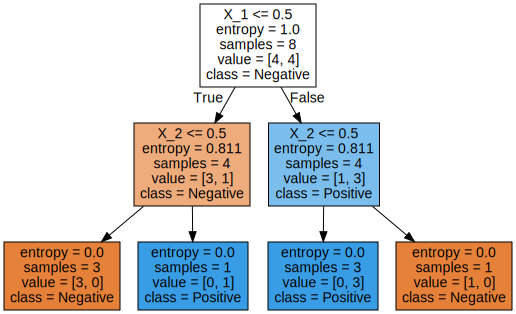

In [8]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

Так выглядит обученное дерево рещений.

Из графика видно, как обученное дерево решений научилось разделять наблюдения, используя переменные X_1 и X_2.

Для удобства восприятия в код были добавлены лейблы Poitive и Negative (y = 1 Posiive, y = 0 Negative).

В самом начале верхний белый квадрат показывает значения (value = [4, 4]) - 4 наблюдения с классом 0 и 4 наблюдения с классом 1.
Энтропия при этом равна единице. И самый первый вопрос, который задаётся дереву на этом шаге: "Правда ли, что X_1 меньше либо равно 0.5?".

И если это правда (когда X_1 = 0), то мы видим, что преобладает класс Negative, и попадаем в левую ветку - 3 наблюдения будут 0 и одно наблюдение - 1.

В обратном случае (когда X_1 = 1), мы попадаем в правую ветку, и у нас преобладает класс Positive. При этому 3 наблюдения будут 1 и одно - 0.

Поскольку в квадратах на втором уровне присутствует по 4 значения (value = [3, 1] и [1, 3]), относящихся к двум различным группам, дереву решений нужно классифицировать эти оставшиеся значения.

Следующий вопрос, который задаётся: "Правда ли что X_2 меньше либо равно 0.5?".

В этом случае все значения, которые меньше 0.5 попадают в класс Negative, а те, которые больше 0.5 - в класс Positive.

Это позволяет безошибочно разделить все наши точки на те, у которых y = 0 или y = 1.

Теперь необходимо понять, как именно дерево решений это сделало, и что за энтропия тут появляется. Она максимальна в самом начале работы алгоритма (entropy = 1), затем уменьшается на втором шаге (entropy = 0.811), и равна нулю когда мы закончили классифицировать наши наблюдения.

Про сложный математический апарат и метрики машинного обучения будет рассказано отдельно.

Справедливости ради хочется отметить, что по умелчанию установлен критерий Джинни (criterion = 'gini'), и если не передать этот параметр, будет использован именно он.

В нашем случае на разницу в результате это не повлияет, только в дереве ниже вместо "entropy" будет "gini". О том, чем критерии отличаются один от другого, написано отдельно.

In [9]:
clf = tree.DecisionTreeClassifier()

X = data[['X_1', 'X_2']]
y = data.Y

clf.fit(X, y)

DecisionTreeClassifier()

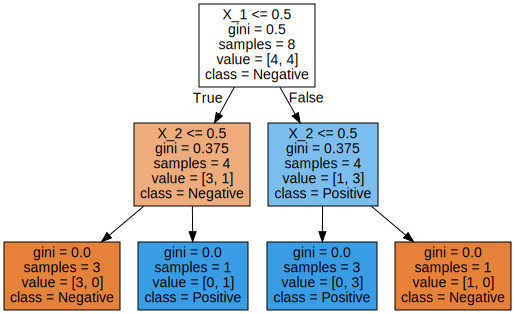

In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))